# 다중분류모델: MNIST

# 1. 환경준비

In [2]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

In [1]:
# 학습곡선 함수

def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

**데이터 로딩**

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# 크기 확인하기
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
# 0~9 숫자 
class_names = ['0','1','2','3','4','5','6','7','8','9']

# 2. 데이터 살펴보기

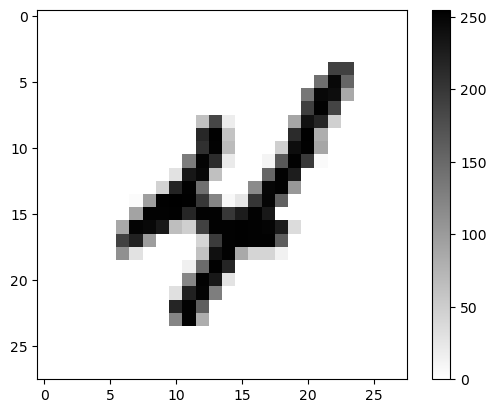

In [11]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 9

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

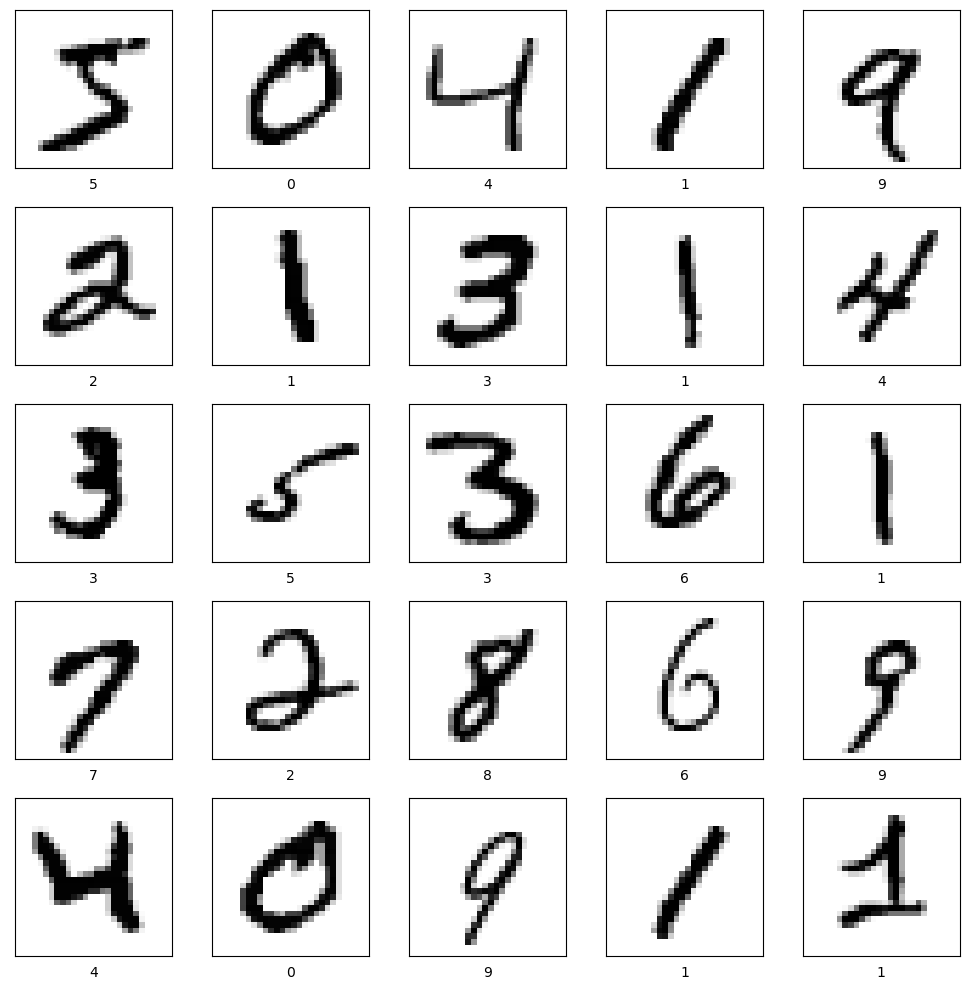

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

# 3. 데이터 준비

**데이터 2차원으로 펼치기**

In [13]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [15]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

**scaling: Min-Max**

In [16]:
# 0~255값을 0~1 사이 값으로 변환.
# x_train, x_test를 255로 나누면 됨.
x_train = x_train / 255.
x_test = x_val / 255.

# 4. 모델링

In [17]:
nfeatures = x_train.shape[1]

clear_session()

model = Sequential(Dense(10   , input_shape = (nfeatures,), activation = 'softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5062 - val_loss: 0.3177
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3174 - val_loss: 0.2904
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2929 - val_loss: 0.2760
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2814 - val_loss: 0.2709
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2737 - val_loss: 0.2694
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - lo

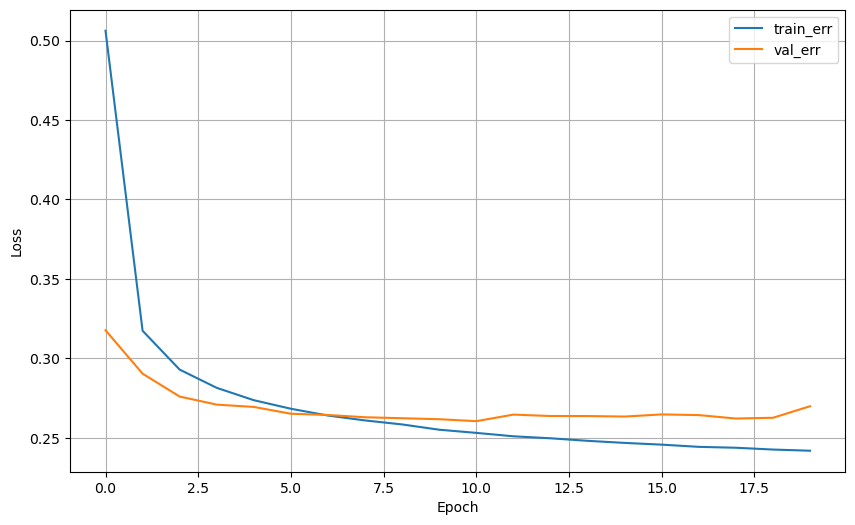

In [18]:
# 학습결과 그래프
dl_history_plot(history)

In [19]:
# 예측
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

# 평가
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

313/313 [==============================] - 0s 1ms/step
[[ 956    0    1    2    0    7   11    2    1    0]
 [   0 1112    3    1    0    1    5    2   11    0]
 [   5   11  923   14    4    3   15   10   43    4]
 [   5    0   20  897    0   32    4   13   30    9]
 [   1    1   10    1  878    0   14    6    9   62]
 [   9    2    3   22    4  787   16    9   32    8]
 [  11    3    7    1    6   10  917    1    2    0]
 [   1    6   22    3    4    1    0  956    2   33]
 [   7    8    6   14    7   24   12   10  874   12]
 [  11    8    1    5   11    8    0   21    7  937]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.93      0.89      0.91      1010
           4       0.96      0.89      0.93       982
           5       0.90      0.88      0.89       892
           6       0.92      0.96  